# Introduction à l'apprentissage automatique - TP3 exercice 2

### Classification supervisée sur données réelles, et sélection de modèle par validation croisée

<br>


On commence par charger quelques bibliothèques...

In [2]:
from sklearn import datasets, neighbors, naive_bayes, linear_model, model_selection
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# pour ignorer les "warnings" concernant les modifications futures
# (pour régression logistique et perceptron)
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

...puis on charge le jeu de données `digits` comme à la séance 2:

In [3]:
dataset = datasets.load_digits()
X_dataset = dataset.data
y_dataset = dataset.target

Bien entendu, quand on s'intéresse à un "vrai" problème de classification supervisée, on ne connaît pas les classes auxquelles les observations-tests appartiennent.

Pour mesurer la performance des différents algorithmes, on va séparer artificiellement le jeu de données en base d'apprentissage et base de test, et on pourra comparer le résultat de classification des observations-tests aux vraies classes.

On sépare aléatoirement le jeu de données en base d'apprentissage et base de
  test (20\% des observations), ainsi:

In [19]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X_dataset,y_dataset,test_size=.2)

Calculez les scores de classification de la base de test pour les algorithmes 1-PPV, 5-PPV, 10-PPV, naive Bayes, régression logistique (c'est une révision de l'exercice 1 de la séance 2), et perceptron.

Constatez que les scores varient si vous ré-exécutez le code de la cellule précédente, la base de test étant choisie aléatoirement.

Moyenne 1-NN 0.9761493860252022
Moyenne logistic regression 0.9310298346839012
Moyenne perc 0.9166165711283545


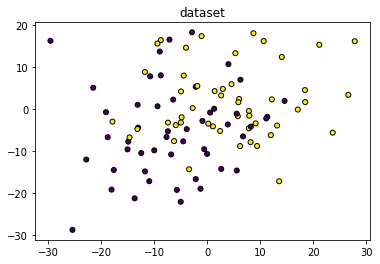

In [18]:

NN = neighbors.KNeighborsClassifier(n_neighbors=1)    
scores_1 = model_selection.cross_val_score(NN, dataset.data, dataset.target, cv=10)
print("Moyenne 1-NN", sum(scores_1)/len(scores_1) )


print(metrics.confusion_matrix(y_test,y_pred_nn))

clf = linear_model.LogisticRegression(solver='liblinear')   
scores_2 = model_selection.cross_val_score(clf, dataset.data, dataset.target, cv=10)
print("Moyenne logistic regression", sum(scores_2)/len(scores_2) )

perc = linear_model.Perceptron(max_iter=200)   
scores_3 = model_selection.cross_val_score(perc, dataset.data, dataset.target, cv=10)
print("Moyenne perc", sum(scores_3)/len(scores_3) )

# print("Moyenne 1-NN %.2f" % sum(scores)/len(scores) )

Comparez les méthodes au sens de la validation croisée à _K_ plis (_K-fold cross validation_), pour $K=10$.

Affichez la matrice de confusion du "meilleur" algorithme lorsque vous séparez base d'apprentissage et base de test dans la base de donnée initiale (avec respectivement 80% et 20% des observations initiales).

_Rappel_: revoyez le TP 2.

In [25]:
from sklearn import metrics

x_train, x_test, y_train, y_test = model_selection.train_test_split(X_dataset,y_dataset,test_size=.2)

NN = neighbors.KNeighborsClassifier(n_neighbors=1)
NN.fit(x_train, y_train)
y_pred_NN = NN.predict(x_test)

print("Plus proches voisins :\n")
print(metrics.confusion_matrix(y_test,y_pred_NN))

clf = linear_model.LogisticRegression(solver='liblinear')   
clf.fit(x_train, y_train)
y_pred_clf = clf.predict(x_test)

print("\nLogistic regression :\n")
print(metrics.confusion_matrix(y_test,y_pred_clf))

perc = linear_model.Perceptron(max_iter=200)
perc.fit(x_train, y_train)
y_pred_perc = NN.predict(x_test)

print("\nPerceptron :\n")
print(metrics.confusion_matrix(y_test,y_pred_perc))


Plus proches voisins :

[[46  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  1  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 34  0  0  0  0  0]
 [ 0  0  0  0  0 30  1  0  0  0]
 [ 0  0  0  0  0  0 39  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  1  0  0  0  0  0  0 30  0]
 [ 0  1  0  0  0  0  0  0  0 37]]

Logistic regression :

[[45  0  0  0  0  1  0  0  0  0]
 [ 0 38  0  1  0  0  1  0  0  0]
 [ 0  0 32  1  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  1  0  0 33  0  0  0  0  0]
 [ 0  0  0  0  0 29  1  1  0  0]
 [ 0  1  0  0  0  0 38  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  2  0  2  0  0  0  0 26  1]
 [ 0  0  0  0  0  0  0  0  0 38]]

perceptron :

[[46  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  1  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 34  0  0  0  0  0]
 [ 0  0  0  0  0 30  1  0  0  0]
 [ 0  0  0  0  0  0 39  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  1  0 


<br>

Identifiez les meilleurs classifieurs dans les deux cas suivants:

* Breast-Cancer décrite [ici](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset).

et qui est fournie dans SKLearn:
``` python
dataset = datasets.load_breast_cancer() 
```

* _South African Heart Disease_ décrite [ici](https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.info.txt) et disponible [là](https://members.loria.fr/FSur/enseignement/apprauto/SAheart.data).

Pour cette base de données, vous allez être amené à charger le fichier CSV comme un dataframe Pandas (ils permettent des fonctionnalités proches des dataframes R).

Puis chargez et traitez les données par:
```` python 
import pandas as pd
dataset=pd.read_csv('SAheart.data')
print(dataset.iloc[:3,:]) 
# On transforme la variable bi-modale en variable qualitative:
dataset.iloc[:,5]=dataset.iloc[:,5].map({'Present':1, 'Absent':0}) 
print(dataset.iloc[:3,:])
X_dataset = dataset.values[:,:-1]
y_dataset = dataset.values[:,-1]
````

<br>

Dans le cas biclasse, quel serait le score de classification d'un tirage aléatoire?


In [29]:
# breast cancers, votre code ici
dataset = datasets.load_breast_cancer()
X_dataset = dataset.data
y_dataset = dataset.target

NN = neighbors.KNeighborsClassifier(n_neighbors=1)    
scores_1 = model_selection.cross_val_score(NN, dataset.data, dataset.target, cv=10)
print("Moyenne 1-NN", sum(scores_1)/len(scores_1) )

NN = neighbors.KNeighborsClassifier(n_neighbors=3)    
scores_1 = model_selection.cross_val_score(NN, dataset.data, dataset.target, cv=10)
print("Moyenne 3-NN", sum(scores_1)/len(scores_1) )

clf = linear_model.LogisticRegression(solver='liblinear')   
scores_2 = model_selection.cross_val_score(clf, dataset.data, dataset.target, cv=10)
print("Moyenne logistic regression", sum(scores_2)/len(scores_2) )

perc = linear_model.Perceptron(max_iter=200)   
scores_3 = model_selection.cross_val_score(perc, dataset.data, dataset.target, cv=10)
print("Moyenne perc", sum(scores_3)/len(scores_3) )

# la régression logistique semble clairement meilleure.

Moyenne 1-NN 0.9158067582749977
Moyenne 3-NN 0.9263330740644715
Moyenne logistic regression 0.9508998790078644
Moyenne perc 0.8488862241811423


In [ ]:
# South African Heart Disease, votre code ici
